# Knowledge Representation - Assignment 2 

## Student ID : R00182510

<b> Change the directory in the chdir command in below cell to point to the local aima python library</b>

In [1]:
## Change the directory in the chdir command to point to the local aima python library
import os

os.getcwd()
print('Change the directory in the chdir command to point to the local aima python library')
os.chdir('C:\\Users\\hp\\OneDrive - mycit.ie\\Desktop\\Sriranjani - CIT AI\\COMP9016 Knowledge Representation\\Assignment 2\\aima-python-master')
os.getcwd()

Change the directory in the chdir command to point to the local aima python library


'C:\\Users\\hp\\OneDrive - mycit.ie\\Desktop\\Sriranjani - CIT AI\\COMP9016 Knowledge Representation\\Assignment 2\\aima-python-master'

Import required files from aima-python and other packages

In [2]:
from learning import *
from probabilistic_learning import *
from notebook import *
from probability import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1.1  Probability Distribution Table

Joint Probability distributions is used to compute probabilities of a combination of values.

Let T and A be two random variables for Tip and Adherance. A joint probability distribution for the given table is created.

The given quantified values are assigned to the random variable pair of (Tip, Adherance).

In [3]:
variables = ['T', 'A']
table = JointProbDist(variables)
table

P(['T', 'A'])

In [4]:
table['Tip1','Never'] = 1
table['Tip1','Rarely'] = 4
table['Tip1','Sometimes'] = 6
table['Tip1','Often'] = 12
table['Tip1','Always'] = 23

table['Tip2','Never'] = 12
table['Tip2','Rarely'] = 4
table['Tip2','Sometimes'] = 12
table['Tip2','Often'] = 4
table['Tip2','Always'] = 2

table['Tip3','Never'] = 24
table['Tip3','Rarely'] = 2
table['Tip3','Sometimes'] = 5
table['Tip3','Often'] = 4
table['Tip3','Always'] = 4

In [5]:
table.values('T'), table.values('A')

(['Tip1', 'Tip2', 'Tip3'], ['Never', 'Rarely', 'Sometimes', 'Often', 'Always'])

Normalizing the table creates the probabilities for each (Tip,Adherance) value. The sum of all the probability vales add up to 1.

The show_approx funtion is used to display the distributions for the entire table.

In [6]:
table.normalize()

table.show_approx()

"('Tip1', 'Always'): 0.193, ('Tip1', 'Never'): 0.0084, ('Tip1', 'Often'): 0.101, ('Tip1', 'Rarely'): 0.0336, ('Tip1', 'Sometimes'): 0.0504, ('Tip2', 'Always'): 0.0168, ('Tip2', 'Never'): 0.101, ('Tip2', 'Often'): 0.0336, ('Tip2', 'Rarely'): 0.0336, ('Tip2', 'Sometimes'): 0.101, ('Tip3', 'Always'): 0.0336, ('Tip3', 'Never'): 0.202, ('Tip3', 'Often'): 0.0336, ('Tip3', 'Rarely'): 0.0168, ('Tip3', 'Sometimes'): 0.042"

## 1.2 Bayesian Networks

<b>Bayesian networks</b>, represent the probabilistic distribution between variables in a network based on the concept of conditional independence. Each node in the network represents a random variable and all nodes together represent a directed acyclic graph. If two variables X and Y exist, an arrow from X to Y indicates tat X is the parent node and Y is the child node. Every child node is quantified using a conditional probability table(CPT) based on the parent nodes's impacts/effects on the child node.

Given, a few random variables, the below visualized Bayesian network was created. The rationale behind the created network is as follows:


- More people getting Employed causes a lot Traffic 
- Traffic and Fossil Fuel causes Global Warming
- Global Warming inturn increases the necessity for usage of Renewable Energy and optimizing Energy efficieny using AI


Each child node from the below picture(to which the arrow is pointing), is said to be conditionally independent on the parent node.

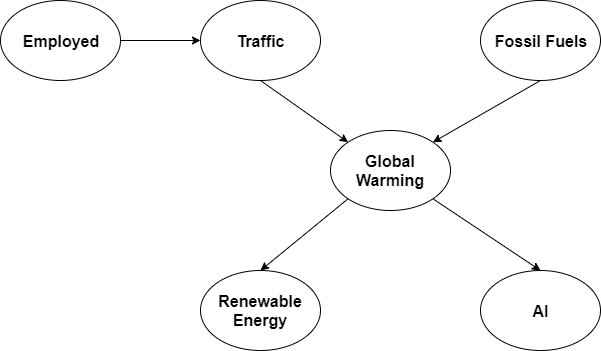

In [7]:
from IPython.display import Image
Image(filename="Bayes_Net_Visualization.png")

The following Bayes nodes were created for each variable involved in the network. When creating each node, the parent node is passed and the probabilities of the current node being True/False given the parent node is also passed to the network.

If an initial node has no parent node, then its parent node is set to empty and a default probabilty is passed as given for the 'Employed' node below.

In [8]:
Employed_node = BayesNode('Employed', '', 0.001)

In [9]:
Traffic_node = BayesNode('Traffic', ['Employed'], {True : 0.80, False: 0.30})
Fossil_Fuels_node = BayesNode('Fossil_Fuels', '', 0.002)

In [10]:
global_warming_node = BayesNode('Global_Warming', ['Traffic', 'Fossil_Fuels'], 
                       {(True, True): 0.95,(True, False): 0.40, (False, True): 0.65, (False, False): 0.010})

In [11]:
Renewable_energy_node = BayesNode('Renewable_Energy', ['Global_Warming'], {True: 0.70, False: 0.15})
AI_node = BayesNode('AI', 'Global_Warming', {(True, ): 0.90, (False, ): 0.20}) # Using string for parents.

All the individual nodes created, can be grouped together to form a Bayesian Network 'my_world' as shown below.


In [12]:
my_world =  BayesNet([('Employed', '', 0.001),
                      ('Traffic', ['Employed'], {True : 0.80, False: 0.30}),
                      ('Fossil_Fuels', '', 0.002),
                      ('Global_Warming', ['Traffic', 'Fossil_Fuels'], 
                       {(True, True): 0.95,(True, False): 0.40, (False, True): 0.65, (False, False): 0.010}),
                      ('Renewable_Energy', ['Global_Warming'], {True: 0.70, False: 0.15}),
                      ('AI', 'Global_Warming', {(True, ): 0.90, (False, ): 0.20})
                     ])                  

my_world

BayesNet([('Employed', ''), ('Traffic', 'Employed'), ('Fossil_Fuels', ''), ('Global_Warming', 'Traffic Fossil_Fuels'), ('Renewable_Energy', 'Global_Warming'), ('AI', 'Global_Warming')])

<b>The details on the Conditional Probability Table (CPT) for each node in the Bayes network is given below and is displayed in the following cells.</b>

- As the Employed node is an initial independent node and has no parent, its probability is set to a default initial value of 0.002.
- The probability of 'Traffic' given Employed = True has a value of 0.8 and given Employed = False has a value of 0.3.
- 'Fossil Fuel' is a fully independant initial variable, and hence has no parent. It is set to an initial probablity of 0.002
- The probability of 'Global Warming' given the boolean combination of its parent's nodes is given below.
- The probability of the usage of 'Renewable Energy' given Global warming = True is 0.7 and given Global warming = False is 0.15
- The probability of the usage of 'AI' for Energy optimization given Global warming = True is 0.9 and givn Global warming = False is 0.2

In [13]:
print('CPT for Employed node ', my_world.variable_node('Employed').cpt)
print('CPT for Traffic node ', my_world.variable_node('Traffic').cpt)
print('CPT for Fossil Fuels node ', my_world.variable_node('Fossil_Fuels').cpt)

CPT for Employed node  {(): 0.001}
CPT for Traffic node  {(True,): 0.8, (False,): 0.3}
CPT for Fossil Fuels node  {(): 0.002}


In [14]:
print('CPT for Global Warming node ')
my_world.variable_node('Global_Warming').cpt

CPT for Global Warming node 


{(True, True): 0.95,
 (True, False): 0.4,
 (False, True): 0.65,
 (False, False): 0.01}

In [15]:
print('CPT for Renewable Energy node ')
my_world.variable_node('Renewable_Energy').cpt

CPT for Renewable Energy node 


{(True,): 0.7, (False,): 0.15}

In [16]:
print('CPT for AI node ')
my_world.variable_node('AI').cpt

CPT for AI node 


{(True,): 0.9, (False,): 0.2}

<b> Querying the network is demonstrated below </b>

Let us see the probability of Traffic created global warming, given Renewable energy to True and usage of AI to False.

In [17]:
ans_dist = enumeration_ask('Traffic', {'Renewable_Energy': True, 'AI': False}, my_world)
ans_dist[True]

0.2644281472057396

Let us see the probability of Global warming, given Renewable energy to True and usage of AI to False.

In [18]:
ans_dist = enumeration_ask('Global_warming', {'Renewable_Energy': True, 'AI': False}, my_world)
ans_dist[True]

0.5

## 2.1 DataSet Probability Computations

### Data
Two multivariate datasets as shown below was chosen for the next two tasks,

- <b> Nursery Dataset</b>
    The nursery database was developed to classify applications for a nursery schools. The classification depends on factors such as parent's occupation, child's nursery requirements, family structure and the family's social and health status. All these factors are represented as features in this dataset which aids in the classification process for decision making.
    
    URL for nursery dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data
    

- <b>Yeast Dataset</b>
    The Yeast dataset is used for predicting the Cellular Localization Sites of Proteins. The features in this dataset represents the proportion of different acid contents and other biological entity proportions that identify a particular type of Yeast/localization sites.
    
    URL for yeast dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data
    
    
All the code implemented for the task below will discuss the different probability/joint probability computations based on the features and the class labels for the dataset.<b> The features of the dataset will serve as the evidence in determining the class value of a queried instance</b>.

### From the perspective of Bayesian Networks
The dataset features serve as evidences and hence in the context of Bayesian networks we can view the class as conditionally independent on all the feature values in the dataset. If we have more details on the data and how each data is derived, we can extend the Bayesian netweork to consider the conditional inpendence between features and thereby deriving the joint distribution probabilities. For now, as we are intersted in a subset of data we will assume that the features are independent of one another.

### Nursery Dataset Computations

All the features in the nursery dataset are discrete values which means the probabiity of each feature value can be determined by counting its occurences and dividing by the total number of values for that particuar feature. The below cell was used to import the nursery dataset and extract a subset of the dataset containg 20 records for the implementaion of the current task.

In [14]:
col_names = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health','class']
nursery_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header = None, names= col_names)

nursery_df_learn = nursery_df[:20]

nursery_df_learn

parents has_nurs      form children     housing     finance         social  \
0    usual   proper  complete        1  convenient  convenient        nonprob   
1    usual   proper  complete        1  convenient  convenient        nonprob   
2    usual   proper  complete        1  convenient  convenient        nonprob   
3    usual   proper  complete        1  convenient  convenient  slightly_prob   
4    usual   proper  complete        1  convenient  convenient  slightly_prob   
5    usual   proper  complete        1  convenient  convenient  slightly_prob   
6    usual   proper  complete        1  convenient  convenient    problematic   
7    usual   proper  complete        1  convenient  convenient    problematic   
8    usual   proper  complete        1  convenient  convenient    problematic   
9    usual   proper  complete        1  convenient      inconv        nonprob   
10   usual   proper  complete        1  convenient      inconv        nonprob   
11   usual   proper  complete        1  convenient      inconv        nonprob   
12   usual   proper  complete        1  convenient      inconv  slightly_prob   
13   usual   proper  complete        1  convenient      inconv  slightly_prob   
14   usual   proper  complete        1  convenient      inconv  slightly_prob   
15   usual   proper  complete        1  convenient      inconv    problematic   
16   usual   proper  complete        1  convenient      inconv    problematic   
17   usual   proper  complete        1  convenient      inconv    problematic   
18   usual   proper  complete        1   less_conv  convenient        nonprob   
19   usual   proper  complete        1   less_conv  convenient        nonprob   

         health       class  
0   recommended   recommend  
1      priority    priority  
2     not_recom   not_recom  
3   recommended   recommend  
4      priority    priority  
5     not_recom   not_recom  
6   recommended    priority  
7      priority    priority  
8     not_recom   not_recom  
9   recommended  very_recom  
10     priority    priority  
11    not_recom   not_recom  
12  recommended  very_recom  
13     priority    priority  
14    not_recom   not_recom  
15  recommended    priority  
16     priority    priority  
17    not_recom   not_recom  
18  recommended  very_recom  
19     priority    priority

<b>Prior probability Computations</b>

The prior probability refers to the class probabilities in the dataset. It is determined by counting the occurences of each class and dividin by the total number of instances with classes.

Prior probabilities of classes
recommend 0.1
priority 0.45
not_recom 0.3
very_recom 0.15


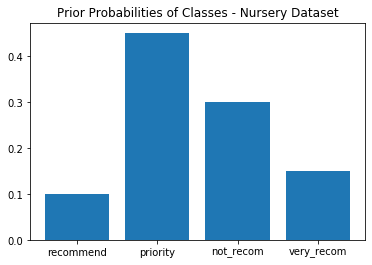

In [5]:
def count_class_values(dataset):
    
    class_values_dict = {}
    n_obs = 0
    
    for item in dataset['class']:
        if item not in class_values_dict:
            class_values_dict[item] = 1
        else:
            class_values_dict[item] += 1
        n_obs += 1
    return class_values_dict, n_obs


def class_prob(value_counts, n_obs):
    class_prior_prob = {}
    
    print('Prior probabilities of classes')
    for k, v in value_counts.items():
        class_prior_prob[k] = v/n_obs
        print(k, class_prior_prob[k])
    return class_prior_prob

    
target_value_couts, n_obs = count_class_values(nursery_df_learn)        
prior_prob = class_prob(target_value_couts, n_obs)


plt.bar(prior_prob.keys(), prior_prob.values())
plt.title('Prior Probabilities of Classes - Nursery Dataset')
plt.show();

<b> Probability of Evidences </b>

The features of the dataset are referred to the evidence in the classification process. Counting its occurences and normalizing it detrmines the probability of evidences/features. The resulting probility values are displayed below.

In [6]:
evidence_prob = {}

print('Probabilities of Evidences')
for i, col_name in enumerate(nursery_df_learn.columns[:-1]):
    evidence_prob['Feature'+str(i+1)] = nursery_df_learn[col_name].value_counts(normalize = True).to_dict()

evidence_prob

Probabilities of Evidences


{'Feature1': {'usual': 1.0},
 'Feature2': {'proper': 1.0},
 'Feature3': {'complete': 1.0},
 'Feature4': {'1': 1.0},
 'Feature5': {'convenient': 0.9, 'less_conv': 0.1},
 'Feature6': {'convenient': 0.55, 'inconv': 0.45},
 'Feature7': {'nonprob': 0.4, 'problematic': 0.3, 'slightly_prob': 0.3},
 'Feature8': {'priority': 0.35, 'recommended': 0.35, 'not_recom': 0.3}}

<b> Probability of likelihood of evidences </b>

The likelihood of the evidences takes the form <b> P(Evidence|Class) * P(Class)</b>

The likelihood of each feature given class will be computed by counting the occurences of the feature values given a particular class value. This is computed for every combination of feature value and class value in the dataset. For reference the likeihood for the first row of the dataset is computed in the below cell and the results are displayed.

In [7]:
nursery = DataSet(examples = np.array(nursery_df_learn))

dataset = nursery

target_vals = dataset.values[dataset.target]
target_dist = CountingProbDist(target_vals)
## Determine the evidence given class combinations in a dictionary
attr_dists = {(gv, attr): CountingProbDist(dataset.values[attr], default = 1)
              for gv in target_vals
              for attr in dataset.inputs}

## Count the combination occurences
for example in dataset.examples:
        targetval = example[dataset.target]
        target_dist.add(targetval)
        for attr in dataset.inputs:
            attr_dists[targetval, attr].add(example[attr])


## the method__getitem__ is used to retrieve the probabilities for the below likelihood combinations
print('Probability of likelihood of evidences')
print('1st Feature given class: ',attr_dists['recommend', 0]['usual'] * prior_prob['recommend'])
print('2nd Feature given class: ',attr_dists['recommend', 1]['proper'] * prior_prob['recommend'])
print('3rd Feature given class: ',attr_dists['recommend', 2]['complete'] * prior_prob['recommend'])
print('4th Feature given class: ',attr_dists['recommend', 3][1] * prior_prob['recommend'])
print('5th Feature given class: ',attr_dists['recommend', 4]['convenient'] * prior_prob['recommend'])
print('6th Feature given class: ',attr_dists['recommend', 5]['convenient'] * prior_prob['recommend'])
print('7th Feature given class: ',attr_dists['recommend', 6]['nonprob'] * prior_prob['recommend'])
print('8th Feature given class: ',attr_dists['recommend', 7]['recommended'] * prior_prob['recommend'])

Probability of likelihood of evidences
1st Feature given class:  0.1
2nd Feature given class:  0.1
3rd Feature given class:  0.1
4th Feature given class:  0.020000000000000004
5th Feature given class:  0.06666666666666667
6th Feature given class:  0.06666666666666667
7th Feature given class:  0.037500000000000006
8th Feature given class:  0.05


### Yeast Dataset Computations

Almost all the features in the yeast dataset are continuous values. The range of continuous values is too high and hence counting the occurences might produce too many results that are supposed to mean the same. For example, 5 and 5.000001 are equal, but while counting is used as in discrete methods, these two values are considered as seperate values. Hence for larger datasets features with continuous values should be handled differently.

As the current subset of 20 records is not a huge dataset, we will apply the discrete method in this task and will handle the continous probability calculations with a different functional distribution in the next task.

In [8]:
col_names = ['Sequence_Name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class']
yeast_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data', header = None, sep ='\s+', names= col_names)

yeast_df_learn = yeast_df[:20]

yeast_df_learn

Sequence_Name   mcg   gvh   alm   mit  erl  pox   vac   nuc class
0     ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22   MIT
1     ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22   MIT
2     ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22   MIT
3     AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22   NUC
4     AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22   MIT
5     AATC_YEAST  0.51  0.40  0.56  0.17  0.5  0.5  0.49  0.22   CYT
6     ABC1_YEAST  0.50  0.54  0.48  0.65  0.5  0.0  0.53  0.22   MIT
7     BAF1_YEAST  0.48  0.45  0.59  0.20  0.5  0.0  0.58  0.34   NUC
8     ABF2_YEAST  0.55  0.50  0.66  0.36  0.5  0.0  0.49  0.22   MIT
9     ABP1_YEAST  0.40  0.39  0.60  0.15  0.5  0.0  0.58  0.30   CYT
10    ACE1_YEAST  0.43  0.39  0.54  0.21  0.5  0.0  0.53  0.27   NUC
11    ACE2_YEAST  0.42  0.37  0.59  0.20  0.5  0.0  0.52  0.29   NUC
12    ACH1_YEAST  0.40  0.42  0.57  0.35  0.5  0.0  0.53  0.25   CYT
13    ACON_YEAST  0.60  0.40  0.52  0.46  0.5  0.0  0.53  0.22   MIT
14    ACR1_YEAST  0.66  0.55  0.45  0.19  0.5  0.0  0.46  0.22   MIT
15     ACT_YEAST  0.46  0.44  0.52  0.11  0.5  0.0  0.50  0.22   CYT
16    ACT2_YEAST  0.47  0.39  0.50  0.11  0.5  0.0  0.49  0.40   CYT
17    ACT3_YEAST  0.58  0.47  0.54  0.11  0.5  0.0  0.51  0.26   NUC
18    ACT5_YEAST  0.50  0.34  0.55  0.21  0.5  0.0  0.49  0.22   NUC
19    ADA2_YEAST  0.61  0.60  0.55  0.21  0.5  0.0  0.50  0.25   NUC

<b> Prior Probability Computations </b>

Prior probabilities of classes
MIT 0.4
NUC 0.35
CYT 0.25


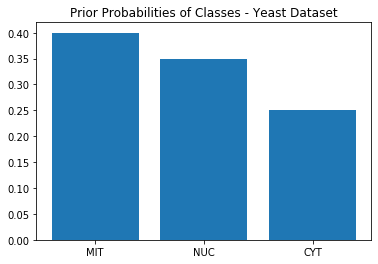

In [9]:
def count_class_values(dataset):
    
    class_values_dict = {}
    n_obs = 0
    
    for item in dataset['class']:
        if item not in class_values_dict:
            class_values_dict[item] = 1
        else:
            class_values_dict[item] += 1
        n_obs += 1
    return class_values_dict, n_obs


def class_prob(value_counts, n_obs):
    class_prior_prob = {}
    
    print('Prior probabilities of classes')
    for k, v in value_counts.items():
        class_prior_prob[k] = v/n_obs
        print(k, class_prior_prob[k])
    return class_prior_prob


target_value_couts, n_obs = count_class_values(yeast_df_learn)        
prior_prob_yeast = class_prob(target_value_couts, n_obs)

plt.bar(prior_prob_yeast.keys(), prior_prob_yeast.values())
plt.title('Prior Probabilities of Classes - Yeast Dataset')
plt.show();

<b> Probability of Evidences </b>

In [10]:
evidence_prob = {}

print('Probabilities of Evidences')
for i, col_name in enumerate(yeast_df_learn.columns[:-1]):
    evidence_prob['Feature'+str(i+1)] = yeast_df_learn[col_name].value_counts(normalize = True).to_dict()

evidence_prob

Probabilities of Evidences


{'Feature1': {'ACT5_YEAST': 0.05,
  'AATM_YEAST': 0.05,
  'ACON_YEAST': 0.05,
  'ADT3_YEAST': 0.05,
  'ADT1_YEAST': 0.05,
  'ACT3_YEAST': 0.05,
  'AATC_YEAST': 0.05,
  'ADA2_YEAST': 0.05,
  'ADT2_YEAST': 0.05,
  'ACT_YEAST': 0.05,
  'ABP1_YEAST': 0.05,
  'ABF2_YEAST': 0.05,
  'AAR2_YEAST': 0.05,
  'ABC1_YEAST': 0.05,
  'ACH1_YEAST': 0.05,
  'ACT2_YEAST': 0.05,
  'ACE2_YEAST': 0.05,
  'ACR1_YEAST': 0.05,
  'ACE1_YEAST': 0.05,
  'BAF1_YEAST': 0.05},
 'Feature2': {0.58: 0.15,
  0.4: 0.1,
  0.43: 0.1,
  0.42: 0.1,
  0.5: 0.1,
  0.61: 0.05,
  0.55: 0.05,
  0.48: 0.05,
  0.6: 0.05,
  0.64: 0.05,
  0.47: 0.05,
  0.51: 0.05,
  0.46: 0.05,
  0.66: 0.05},
 'Feature3': {0.39: 0.15,
  0.44: 0.15,
  0.4: 0.1,
  0.54: 0.05,
  0.34: 0.05,
  0.62: 0.05,
  0.55: 0.05,
  0.6: 0.05,
  0.45: 0.05,
  0.61: 0.05,
  0.47: 0.05,
  0.37: 0.05,
  0.42: 0.05,
  0.5: 0.05,
  0.67: 0.05},
 'Feature4': {0.48: 0.15,
  0.54: 0.1,
  0.55: 0.1,
  0.52: 0.1,
  0.57: 0.1,
  0.59: 0.1,
  0.56: 0.05,
  0.45: 0.05,
  0.6: 0

<b> Probability of likelihood of Evidences </b>


The likelihood of the evidences takes the form <b> P(Evidence|Class) * P(Class)</b>

The likelihood of each feature given class will be computed by counting the occurences of the feature values given a particular class value. This is computed for every combination of feature value and class value in the dataset. For reference the likeihood for the first row of the dataset is computed in the below cell and the results are displayed.

In [11]:
yeast = DataSet(examples = np.array(yeast_df_learn))

dataset = yeast

target_vals = dataset.values[dataset.target]
target_dist = CountingProbDist(target_vals)
## Determine the evidence given class combinations in a dictionary
attr_dists = {(gv, attr): CountingProbDist(dataset.values[attr], default = 1)
              for gv in target_vals
              for attr in dataset.inputs}

## Count the combination occurences
for example in dataset.examples:
        targetval = example[dataset.target]
        target_dist.add(targetval)
        for attr in dataset.inputs:
            attr_dists[targetval, attr].add(example[attr])


## the method__getitem__ is used to retrieve the probabilities for the below likelihood combinations
print('Probability of likelihood of evidences')
print('1st Feature given class: ',attr_dists['MIT', 0]['ADT1_YEAST'] * prior_prob_yeast['MIT'])
print('2nd Feature given class: ',attr_dists['MIT', 1][0.58] * prior_prob_yeast['MIT'])
print('3rd Feature given class: ',attr_dists['MIT', 2][0.61] * prior_prob_yeast['MIT'])
print('4th Feature given class: ',attr_dists['MIT', 3][0.47] * prior_prob_yeast['MIT'])
print('5th Feature given class: ',attr_dists['MIT', 4][0.13] * prior_prob_yeast['MIT'])
print('6th Feature given class: ',attr_dists['MIT', 5][0.50] * prior_prob_yeast['MIT'])
print('7th Feature given class: ',attr_dists['MIT', 6][0.00] * prior_prob_yeast['MIT'])
print('8th Feature given class: ',attr_dists['MIT', 7][0.48] * prior_prob_yeast['MIT'])
print('9th Feature given class: ',attr_dists['MIT', 8][0.22] * prior_prob_yeast['MIT'])


Probability of likelihood of evidences
1st Feature given class:  0.025
2nd Feature given class:  0.03333333333333333
3rd Feature given class:  0.031578947368421054
4th Feature given class:  0.03529411764705883
5th Feature given class:  0.03529411764705883
6th Feature given class:  0.4
7th Feature given class:  0.33333333333333337
8th Feature given class:  0.06153846153846154
9th Feature given class:  0.16666666666666669


## 2.2 Naive Bayes Learner


Naive Bayes Learner uses the concept of [Bayes' Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem) and probability based computations for classification of a set of instances. The theorem states that "the conditional probability of **A** given **B** equals the conditional probability of **B** given **A** multiplied by the probability of **A**, divided by the probability of **B**".(Reffered from Aima repo- learning.ipynb)

$$P(A|B) = \dfrac{P(B|A)*P(A)}{P(B)}$$


Each instance is made up of a set of attributes(denoting <b>B</b> in the above Formula) that helps with the classification process. <b>A</b> represents the class values in the dataset. The Class given evidence(<b>A|B</b>) is calculated by multiplying the product of probabilities of all the evidences given class(<b>P(B|A)</b>) and the probability of the class(<b>P(A)</b>).

The nursery and yeast datasets were used in implementing the Naive Bayes Learner and its performance was evaluated for each dataset. The performance factor here is related to accuracy of the Learner model (ie. how accurately the learner determines the classes of each instance(with a set of attributes).

Both the datasets differ in the type of feature values that determine the class. The nursery dataset has discrete feature values, whereas the yeast dataset has continuous feature values. The methods in which the probability distributions are calculated for each dataset will differ. More details are discussed through the below code.

### Nursery Dataset - NB Learner

In [25]:
col_names = ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health','class']
nursery_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data', header = None, names= col_names)

nursery = DataSet(examples = np.array(nursery_df))

In [26]:
print(nursery.examples[0])
print(nursery.inputs)

['usual' 'proper' 'complete' '1' 'convenient' 'convenient' 'nonprob'
 'recommended' 'recommend']
[0, 1, 2, 3, 4, 5, 6, 7]


In [27]:
print("attrs:", nursery.attrs)
print("attrnames (by default same as attrs):", nursery.attr_names)
print("target:", nursery.target)
print("inputs:", nursery.inputs)

attrs: [0, 1, 2, 3, 4, 5, 6, 7, 8]
attrnames (by default same as attrs): [0, 1, 2, 3, 4, 5, 6, 7, 8]
target: 8
inputs: [0, 1, 2, 3, 4, 5, 6, 7]


In [28]:
print(nursery.values[1])

['less_proper', 'proper', 'very_crit', 'improper', 'critical']


In [29]:
print(nursery.values[nursery.target])

['recommend', 'spec_prior', 'very_recom', 'priority', 'not_recom']


From the 12959 records in the dataset, the 1st 11000 will be used for the learning process, whereas the remaining records will be used to evaluate the performance of the Naive Bayes Learner.


Since all attributes in the nursery dataset are of discrete type, the probabilities of each feature value can be determined by adding the count of their occurences and dividing by the total number of instance features. 

The features in the dataset relate to the evidence in Bayes Theorem and determining <b>P(Class|Feature_name)</b> involves counting the number of features for the particular class and the implicit function named \__getitem__ is used to retrieve the probablity value. 

From the two print stetements below, the first result shows the probability of the class 'very_recom' and the second statement shows <b>P('very_recom' | Feature_1 ='proper')</b>.

In [30]:
dataset = nursery

target_vals = dataset.values[dataset.target]
target_dist = CountingProbDist(target_vals)
attr_dists = {(gv, attr): CountingProbDist(dataset.values[attr])
              for gv in target_vals[:11000]
              for attr in dataset.inputs[:11000]}
#print(attr_dists)
for example in dataset.examples[:11000]:
        targetval = example[dataset.target]
        target_dist.add(targetval)
        for attr in dataset.inputs:
            attr_dists[targetval, attr].add(example[attr])


print(target_dist['very_recom'])
print(attr_dists['very_recom', 1]['proper'])

0.029895502044525214
0.3933933933933934


Once the learning process is complete, the prediction is applied to the records/instances that were set aside for evauation. 

<b>P(Class|Feature_name)</b> is calculated for each class and each feature set. The product of all the class given evidence is determined and the class that has the highest/maximum probability is determined as the class for the particular instance. A total of 1959 instances were used for the prediction process

In [21]:
def predict(example):
    def class_probability(targetval):
        return (target_dist[targetval] *
                product(attr_dists[targetval, attr][example[attr]]
                        for attr in dataset.inputs))
    return max(target_vals, key=class_probability)



predicted = []
for i, test_input in enumerate(dataset.examples[11001:]):
    predicted.append(predict(test_input[:-1]))

len(np.array(predicted))

1959

The actual labels for all the records are retrieved for comparison with the predicted results. When comparing the actual labels with the predicted labels, an accuracy of 91.5% was reported. This means that the learner was able to correctly classify 91.5% of the records based on the joint probability distribution of the features .

In [22]:
df = pd.DataFrame(dataset.examples[11001:])
actual_class = np.array(df[8])
len(actual_class)

1959

In [23]:
accuracy = (np.sum(predicted == actual_class) / len(actual_class)) * 100
print('Accuracy', accuracy)

Accuracy 91.57733537519142


The stacked bar chart below, displays the number of correctly classified and the misclassified instances under each class labels.  The blue bars show the correctly classified proportion and the red bars show the misclassified proportion.

From a total of 1200 records of class 'spec_prior', approx 1100 were correctly classified. Similarly the proportions for the other classes are shown in the chart.

<b>The overall performance of the Naive Bayes Learner for the nursery dataset has been very efficient with an accuracy of 91.6%  and with fewer misclassifications.</b>

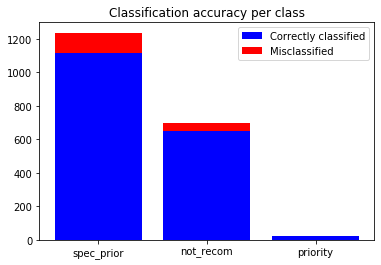

In [24]:
correct_predictions = [x for x, y in zip(predicted, actual_class) if x == y]
incorrect_predictions = [x for x, y in zip(predicted, actual_class) if x != y]


dict1 = {'not_recom':0}
correct_count = pd.Series(correct_predictions).value_counts()
incorrect_count = pd.Series(incorrect_predictions).value_counts().append(pd.Series(dict1))

X = correct_count.index
plt.bar(X, correct_count, color = 'b')
plt.bar(X, incorrect_count, color = 'r', bottom = correct_count)
plt.legend(['Correctly classified', 'Misclassified'])
plt.title('Classification accuracy per class')
plt.show()


### Yeast Dataset - NB Learner

The Naive Bayes learner was also applied to the yeast dataset, which is used in classification of the yeast category based on a set a attributes/features. Out of the total 1483 records, the first 1400 records was used for the learning process and the remaining 83 records were used for evaluating the Bayes learner.

Unlike the nursery dataset which had discrete feature values, all the features in the yeast dataset are continuous values. Hence adding the occurences of the values to determine the probability will not be a suitable method for this dataset. Instead, we will calculate the means and deviations of each feature column and pass this along with the queried instances' feature values to the Gaussian function distribution to determine the class of a particular query instance.

All the code pertaining to the above discussion is given below.

In [37]:
col_names = ['Sequence_Name', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'class']
yeast_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/yeast/yeast.data', header = None, sep ='\s+', names= col_names)

yeast_df.drop(columns=['Sequence_Name', 'pox', 'erl'], inplace =True)

yeast_df_learn = yeast_df[:1400]
yeast_df_eval = yeast_df[1401:]

actual_class = np.array(yeast_df_eval['class'])

yeast_array_learn = yeast_df_learn.to_numpy()
yeast_array_eval = yeast_df_eval.to_numpy()

yeast = DataSet(examples = yeast_array_learn)

print(yeast_array_learn.shape)
print(yeast_array_eval.shape)

(1400, 7)
(83, 7)


Examples represent each instance/record in the dataset and inputs refer to the indices of the features of this dataset.

In [38]:
print(yeast.examples[0])
print(yeast.inputs)

[0.58 0.61 0.47 0.13 0.48 0.22 'MIT']
[0, 1, 2, 3, 4, 5]


In [39]:
print("attrs:", yeast.attrs)
print("attrnames (by default same as attrs):", yeast.attr_names)
print("target:", yeast.target)
print("inputs:", yeast.inputs)

attrs: [0, 1, 2, 3, 4, 5, 6]
attrnames (by default same as attrs): [0, 1, 2, 3, 4, 5, 6]
target: 6
inputs: [0, 1, 2, 3, 4, 5]


In [40]:
print(yeast.values[1])


[0.54, 0.5, 0.75, 0.25, 0.51, 0.26, 0.76, 1.0, 0.52, 0.77, 0.84, 0.23, 0.79, 0.22, 0.21, 0.63, 0.88, 0.38, 0.13, 0.47, 0.72, 0.44, 0.45, 0.42, 0.43, 0.18, 0.2, 0.46, 0.41, 0.35, 0.85, 0.69, 0.16, 0.17, 0.55, 0.8, 0.64, 0.14, 0.89, 0.48, 0.73, 0.57, 0.82, 0.61, 0.67, 0.62, 0.4, 0.39, 0.37, 0.59, 0.83, 0.92, 0.6, 0.68, 0.27, 0.36, 0.86, 0.7, 0.56, 0.81, 0.65, 0.9, 0.74, 0.24, 0.49, 0.58, 0.34, 0.29, 0.3, 0.31, 0.32, 0.33, 0.53, 0.78, 0.28, 0.87, 0.71, 0.66]


A list of all the target/class values is given below

In [41]:
print(yeast.values[yeast.target])

['MIT', 'NUC', 'CYT', 'VAC', 'EXC', 'ME2', 'ME1', 'ME3', 'ERL', 'POX']


The means and deviations of all the features are determined. An example of querying the means and deviations for the feature 'ME1' is shown below.

In [42]:
dataset = yeast
means, deviations = dataset.find_means_and_deviations()

target_vals = dataset.values[dataset.target]
target_dist = CountingProbDist(target_vals)


print(means['ME1'])
print(deviations['ME1'])



[0.7858333333333334, 0.7563888888888889, 0.3738888888888889, 0.32472222222222225, 0.5161111111111111, 0.2658333333333333]
[0.06838441760685378, 0.069904129360055, 0.056582570651988774, 0.1354671517614112, 0.06481965212485563, 0.08980534505250788]


The dataset instances that was set aside for evaluation is used in the prediction process, to determine the accuracy of Naive Bayes learner for the yeast dataset. As discussed before, the gaussian function was used detrmine the distributions of continuos feature values.

In [43]:
def predict(example):
    """Predict the target value for example. Consider each possible value,
    and pick the most likely by looking at each attribute independently."""
    
    def class_probability(target_val):
        prob = target_dist[target_val]
        for attr in dataset.inputs:
            prob *= gaussian(means[target_val][attr], deviations[target_val][attr], example[attr])
        return prob
    return max(target_vals, key=class_probability)

In [44]:
predicted = []
for item in yeast_array_eval:
    predicted.append(predict(item[:-1]))
    
np.array(predicted)

array(['ME3', 'ME2', 'ME3', 'POX', 'ME3', 'ME3', 'ME3', 'ME1', 'POX',
       'EXC', 'ME3', 'CYT', 'ME2', 'VAC', 'NUC', 'VAC', 'ME3', 'POX',
       'ME3', 'ERL', 'VAC', 'CYT', 'ERL', 'ME1', 'NUC', 'ME3', 'ME3',
       'VAC', 'POX', 'ME3', 'MIT', 'EXC', 'ME3', 'ME1', 'NUC', 'EXC',
       'EXC', 'ME3', 'MIT', 'ME2', 'NUC', 'EXC', 'ME1', 'POX', 'ME3',
       'MIT', 'NUC', 'NUC', 'VAC', 'ME1', 'CYT', 'NUC', 'ME3', 'MIT',
       'NUC', 'ME1', 'CYT', 'POX', 'NUC', 'MIT', 'ERL', 'MIT', 'NUC',
       'NUC', 'NUC', 'ME3', 'CYT', 'POX', 'POX', 'MIT', 'CYT', 'NUC',
       'POX', 'POX', 'EXC', 'POX', 'CYT', 'CYT', 'ME2', 'NUC', 'ME2',
       'NUC', 'POX'], dtype='<U3')

By comparing the predicted values and the actual values, an accuracy of 50.6% was reported. 

The stacked bar chart below, displays the number of correctly classified and the misclassified instances under each class labels.  The blue bars show the correctly classified proportion and the red bars show the misclassified proportion.

From a total of 28 records of class 'ME3', approx 15 were correctly classified and the remaining were misclassified. Similarly the proportions for the other classes are shown in the chart.

<b>The overall performance of the Naive Bayes Learner for the yeast dataset has been poor with an accuracy of 50.6%  and with equal amount of misclassifications.</b>

In [45]:
accuracy = (np.sum(predicted == actual_class) / len(actual_class)) * 100
accuracy


50.602409638554214

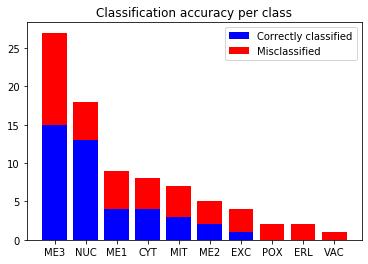

In [46]:
correct_predictions =[x for x, y in zip(predicted, actual_class) if x == y]
incorrect_predictions = pd.Series([x for x, y in zip(predicted, actual_class) if x != y])


dict1 = {'POX':0,'ERL':0,'VAC':0}
correct_count = pd.Series(correct_predictions).value_counts().append(pd.Series(dict1))
incorrect_count = (incorrect_predictions.value_counts())

X = correct_count.index
plt.bar(X, correct_count, color = 'b')
plt.bar(X, incorrect_count, color = 'r', bottom = correct_count)
plt.legend(['Correctly classified', 'Misclassified'])
plt.title('Classification accuracy per class')
plt.show()